In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import numpy as np
df_laptop= pd.read_csv('./clean/laptops.csv')
df_laptop.store.value_counts()

Boulanger (FR)    82
Amazon (SA)       72
Jumia (EG)        45
Name: store, dtype: int64

Compate discounts on all sites relative to each other 
1. box plot of discount values for each site 
2. faceit of 3 graphs ... for each site create a scatterplot of discount vs price 
3. a scatterplot of discount vs price with encoding of markers or color on each dataset 

# Univariate Visualisations

what is the price Distribution ?

Price Distribution seems to be concentrated in the 1k to 2k range with decreasing number of laptops as you increase the price

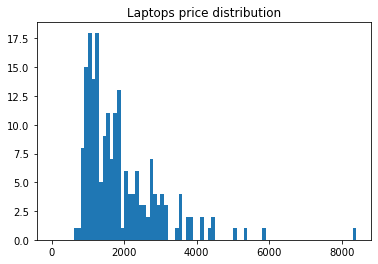

In [3]:
# Histogram of the price distribution
bin_step= 100
bins = np.arange(0, df_laptop['price'].max()+bin_step, bin_step)
_, _, fig= plt.hist(data = df_laptop, x = 'price', bins = bins)
plt.title('Laptops price distribution');

what are the expected Disconts on laptops? do most laptops have discounts?

No it seems most laptops have no discount and as the discount value increases the number of laptops decreases. could mean that companies do not want to put discounts on their laptops at least till they are sure they won't sell at this price

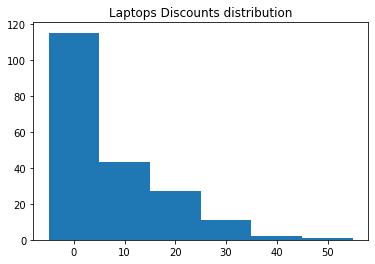

In [4]:
# Histogram of discount disctibution 
bin_step= 10
bins = np.arange(0-bin_step//2, df_laptop['discount_value'].max()+bin_step+ bin_step//2, bin_step)
_, _, fig= plt.hist(data = df_laptop, x = 'discount_value', bins = bins)
plt.title('Laptops Discounts distribution');

How many laptops are in this dataset from each store?

Boulanger has the most folloerd by Amazon

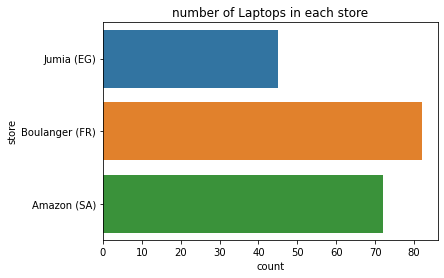

In [5]:
# compare the number of Laptops that were scrapped from each sotre
df_laptop.head()
sb.countplot(data=df_laptop, y='store');
plt.title('number of Laptops in each store');

Does Intel have more laptops than AMD?

Yes it seems Intel is dominanat worldwide

Text(0.5, 1.0, 'number of Laptops with Intel vs AMD')

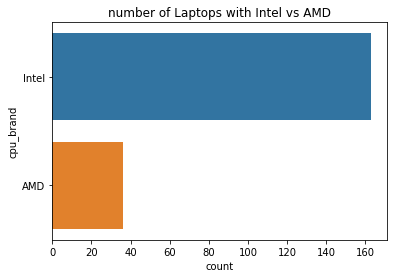

In [6]:
# barplot comapring laptops with Intel vs Laptops with AMD CPU
df_laptop.head()
sb.countplot(data=df_laptop, y='cpu_brand');
plt.title('number of Laptops with Intel vs AMD')

As you can see in the below graph it seems that some of the CPU names are in arabic while others are in english with some even in Franco

so to get more consistent results we will use cpu_gen and cpu_brand to compare CPU's

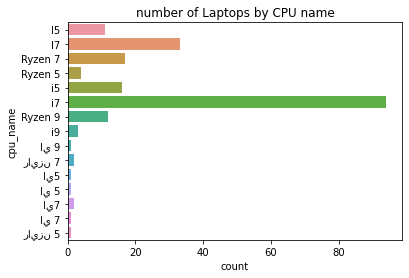

In [7]:
# Compare the number of Laptops based on CPU names
df_laptop.head()
sb.countplot(data=df_laptop, y='cpu_name');
plt.title('number of Laptops by CPU name');

Are some cpu geneations more prevelant than others? 
yes with the 7 gen beign the most prevalent

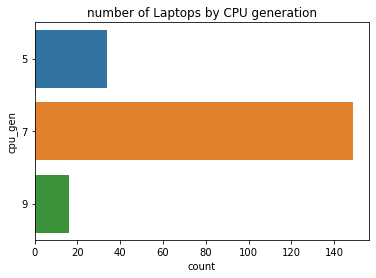

In [8]:
# barplot showing the number of laptops for each CPU gen
sb.countplot(data=df_laptop, y='cpu_gen');
plt.title('number of Laptops by CPU generation');

is there corelation between Price and discount? 

seems not but it does seem the price and discount values are influenced b where they are sold.

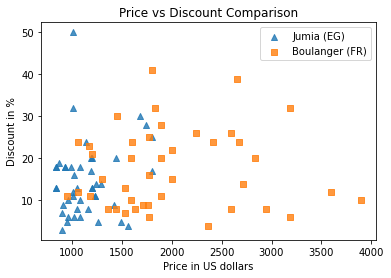

In [9]:
# scatter plot of price vs discount with markers for each store , Amazon was removed as it did not have discounts at that time
df_vis= df_laptop.copy()
df_vis= df_vis[~(df_vis.discount_value ==0)]
markers= [['Jumia (EG)', '^'], ['Boulanger (FR)', 's']]
for category, marker in markers:
    temp= df_vis[df_vis['store']== category]
    sb.regplot(data = temp, x = 'price', y = 'discount_value', marker = marker, fit_reg=False, x_jitter=0.04) 
plt.legend(labels=['Jumia (EG)', 'Boulanger (FR)'])
plt.title('Price vs Discount Comparison')
plt.xlabel('Price in US dollars')
plt.ylabel('Discount in %');

Discount values in each store? 

same average discount with Boulanger having more variation.

Text(0, 0.5, 'Discount in %')

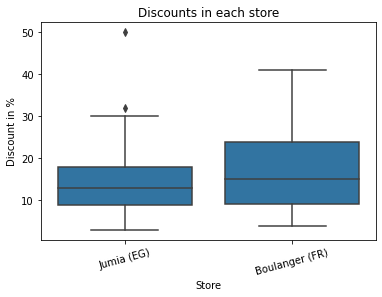

In [10]:
# Box plot comparing the discount values in each store
base_color = sb.color_palette()[0]
#sb.violinplot(data=df_vis, x='store', y='discount_value', color=base_color, innner=None)
plt.xticks(rotation=15);
sb.boxplot(data=df_vis, x='store', y='discount_value', color=base_color)
plt.title('Discounts in each store')
plt.xlabel('Store')
plt.ylabel('Discount in %');


compare price for AMD vs Intel CPU 
compare storage options sold on each website
compare shiping time 
compare the brands on each website in a countplot 

Text(0, 0.5, 'Price')

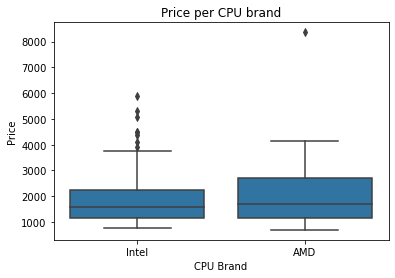

In [11]:
# Box plot comparing the price of each CPU brand
df_vis= df_laptop.copy()
# price comparsion between CPU brand 
sb.boxplot(data=df_vis, x='cpu_brand', y='price', color=base_color);
plt.title('Price per CPU brand')
plt.xlabel('CPU Brand')
plt.ylabel('Price')

does any of the CPU brands have more discounts on average? 

no they seem to be ties with Intel having more outliers that can even reach 50%

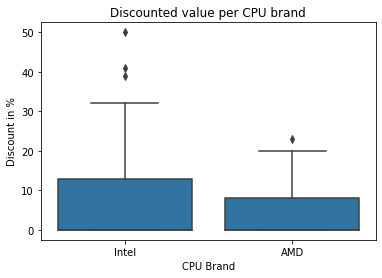

In [12]:
# discounts comparsion between CPU brand 
sb.boxplot(data=df_vis, x='cpu_brand', y='discount_value', color=base_color);
plt.title('Discounted value per CPU brand')
plt.xlabel('CPU Brand')
plt.ylabel('Discount in %');

Look closer in price per each genearion also

it seems the higher end model are cheaper for AMD then Intel.

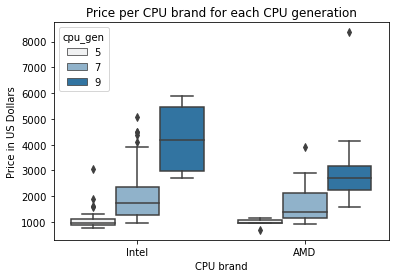

In [13]:

# price comparsion between CPU brand 
sb.boxplot(data=df_vis, x='cpu_brand', hue= 'cpu_gen', y='price', color=base_color);
plt.title('Price per CPU brand for each CPU generation')
plt.xlabel('CPU brand')
plt.ylabel('Price in US Dollars');

frequency of each CPU geneartion for each site?

the Intel i7 is the most dominant with Intel crushing AMD on each category

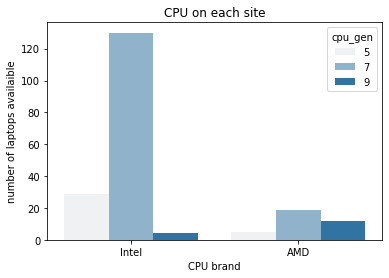

In [14]:
# number of cpu sold on all sites while taking into account the CPu generation
sb.countplot(data = df_vis, x = 'cpu_brand', hue = 'cpu_gen', color= base_color)
plt.title('CPU on each site')
plt.xlabel('CPU brand')
plt.ylabel('number of laptops availaible');

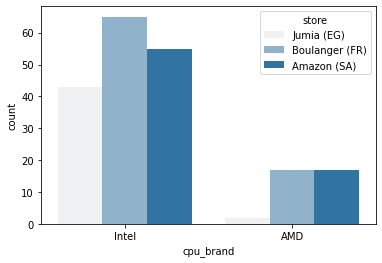

In [15]:
# brands sold on each site clear intel vicotry
sb.countplot(data = df_vis, x = 'cpu_brand', hue = 'store', color= base_color);

regression line using features to predict price 
get most important features for each site 


using the Boulanger data we will try to predict the price using liner Regression (notice the data didnt change this is just the cleaned data from the french site but with all the extra columns)

In [16]:
import statsmodels.api as sm

In [17]:
df_fr= pd.read_csv('./clean/boulanger_store.csv')
df_fr.head(1)

,Unnamed: 0,text,url,display,refresh_rate,cpu,storage,ram,price,earliest_arrival,ports,price_before_discount,discount,cpu_name,cpu_gen,cpu_brand,discount_value,ram_value,weight_KG,store
0,0,PC Gamer \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tDell\n\...,https://www.boulanger.com/ref/1152079,"15,6"" Full HD (39,6 cm) - 120 Hz",120 Hz,"Intel Core i5 - 10300H : 2,5 GHz / Turboboost ...",SSD 512 Go,"Mémoire vive 8 Go - 2,3 kg",1062,chez vous dès vendredi 12 mars,Le + : USB C + Clavier rétro-éclairé,"1199,00€",- 24%,i5,5,Intel,24,8.0,2.3,Boulanger (FR)


In [18]:
df_fr.display.value_counts()

17,3" Full HD (43,9 cm) - 144 Hz           16
15,6" Full HD (39,6 cm) - 144 Hz           16
15,6" Full HD (39,6 cm) - 300 Hz            7
15,6" Full HD (39,6 cm) - 120 Hz            7
17,3" Full HD (43,9 cm) - 300 Hz            7
15,6" (39,6 cm) - 144 Hz                    6
15,6" Full HD (39,6 cm) - 60 Hz             4
17,3" Full HD (43,9 cm) - 120 Hz            4
15,6" 4K (39,6 cm) - 60 Hz                  2
15,6" Full HD (39,6 cm) - 240 Hz            2
14" Full HD (35,6 cm) - 120 Hz              2
14" Full HD (35,6 cm) - 60 Hz               2
17,3" 4K (43,9 cm) - 60 Hz                  1
17,3" (43,9 cm) - 144 Hz                    1
16" (40,64 cm) - 144 Hz                     1
Tactile 15,6" Full HD (39,6 cm) - 60 Hz     1
15" (38,1 cm) - 144 Hz                      1
14" Full HD (35,6 cm) - 144 Hz              1
15,6" (39,6 cm) - 120 Hz                    1
Name: display, dtype: int64

Feature Engineering 
1. create columns for refresh rate, Dsiplay_type only extract 4k assuming all other displays are Full HD, display_width, dsiplay_height, display_size in inches, 
2. extract features from storage columns SSD, HDD, Size 
    - create col for memory 1 and memory 2 as many laptops have 2 memory slots 
3. extract features ram and weight also clean some columns (done in cleaning)
4. arrival time from 2 weeks, opened for less than 6 days (Used),Indisponible (Not availaible) and remove otheres that take longer as they will add unessacesary varaibles to the model

In [19]:
df_fr.weight_KG.describe()


count    82.000000
mean      2.467073
std       0.547284
min       1.300000
25%       2.200000
50%       2.400000
75%       2.600000
max       4.700000
Name: weight_KG, dtype: float64

In [20]:
# create 4 columns: storage_type_1 , storage_capacity_1, storage_type_2, storage_capacity_2
def extract_storage_info(string):
    amount_pattern = r'(?:SSD \d+|Disque dur \d+)'
    amount_expr = re.compile(amount_pattern, re.IGNORECASE)
    occurences= amount_expr.findall(string)
    storage_reg= r'(?:SSD|Disque dur)'
    capacity_reg= r'(\d+)'

    if(len(occurences)==2): # if we have 2 storages
        storage_type1= re.search(storage_reg, occurences[0], re.IGNORECASE)
        strage_type2= re.search(storage_reg, occurences[1], re.IGNORECASE)
        storage_cpacity1= re.search(capacity_reg, occurences[0], re.IGNORECASE)
        storage_cpacity2=  re.search(capacity_reg, occurences[1], re.IGNORECASE)
        return storage_type1[0], storage_cpacity1[0], strage_type2[0], storage_cpacity2[0]
    else:
        storage_type1= re.search(storage_reg, occurences[0], re.IGNORECASE)
        storage_cpacity1= re.search(capacity_reg, occurences[0], re.IGNORECASE)
        return storage_type1[0], storage_cpacity1[0], np.nan, np.nan
df_fr['storage_type_1']= df_fr.storage.map(lambda x:extract_storage_info(x)[0])
df_fr['storage_capacity_1']= df_fr.storage.map(lambda x:extract_storage_info(x)[1])
df_fr['storage_type_2']= df_fr.storage.map(lambda x:extract_storage_info(x)[2])
df_fr['storage_capacity_2']= df_fr.storage.map(lambda x:extract_storage_info(x)[3])
# turn all 1 terra into 1k GB for consistency
df_fr['storage_capacity_1']=df_fr['storage_capacity_1'].map(lambda x: 1000 if float(x)==1 else float(x))
df_fr['storage_capacity_2']=df_fr['storage_capacity_2'].map(lambda x: 1000 if float(x)==1 else float(x))
df_fr.head(1)

,Unnamed: 0,text,url,display,refresh_rate,cpu,storage,ram,price,earliest_arrival,...,cpu_gen,cpu_brand,discount_value,ram_value,weight_KG,store,storage_type_1,storage_capacity_1,storage_type_2,storage_capacity_2
0,0,PC Gamer \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tDell\n\...,https://www.boulanger.com/ref/1152079,"15,6"" Full HD (39,6 cm) - 120 Hz",120 Hz,"Intel Core i5 - 10300H : 2,5 GHz / Turboboost ...",SSD 512 Go,"Mémoire vive 8 Go - 2,3 kg",1062,chez vous dès vendredi 12 mars,...,5,Intel,24,8.0,2.3,Boulanger (FR),SSD,512.0,NaN,NaN


In [21]:
df_fr.ram.value_counts()

Mémoire vive 16 Go - 2,3 kg    7
Mémoire vive 16 Go - 2,4 kg    7
Mémoire vive 16 Go - 2,6 kg    6
Mémoire vive 16 Go - 1,7 kg    5
Mémoire vive 8 Go - 2,3 kg     4
Mémoire vive 16 Go - 2,2 kg    4
Mémoire vive 32 Go - 2,5 kg    4
Mémoire vive 32 Go - 2,4 kg    4
Mémoire vive 32 Go - 2,3 kg    3
Mémoire vive 16 Go - 2,9 kg    3
Mémoire vive 32 Go - 2,1 kg    3
Mémoire vive 32 Go - 2,9 kg    3
Mémoire vive 16 Go - 2,0 kg    2
Mémoire vive 32 Go - 2,6 kg    2
Mémoire vive 32 Go - 3,0 kg    2
Mémoire vive 16 Go - 4,7 kg    2
Mémoire vive 16 Go - 2,8 kg    1
2,6 kg                         1
Mémoire vive 8 Go - 2,6 kg     1
Mémoire vive 32 Go - 3,2 kg    1
Mémoire vive 32 Go - 1,6 kg    1
Mémoire vive 16 Go - 3,5 kg    1
Mémoire vive 16 Go - 1,3 kg    1
Mémoire vive 16 Go - 1,6 kg    1
Mémoire vive 16 Go - 2,1 kg    1
Mémoire vive 16 Go - 2,7 kg    1
Mémoire vive 16 Go - 3,0 kg    1
Mémoire vive 8 Go - 2,2 kg     1
Mémoire vive 8 Go - 2,4 kg     1
Mémoire vive 16 Go - 2,5 kg    1
Mémoire vi

In [22]:
df_fr.earliest_arrival.value_counts()
df_fr= df_fr[~(df_fr.earliest_arrival=='chez vous dès mardi 23 mars')]
df_fr.earliest_arrival.value_counts()


chez vous dès vendredi 12 mars    61
sous 6 jours ouvrés               13
indisponible                       7
Name: earliest_arrival, dtype: int64

In [23]:
df_model= df_fr.copy()
# one hot encode earliest arrival
df_model= df_fr.join(pd.get_dummies(df_fr.earliest_arrival))
#one hot encode storage_type1
df_model= df_model.join(pd.get_dummies(df_fr.storage_type_1, prefix='type_1'))
df_model= df_model.join(pd.get_dummies(df_fr.storage_type_2, prefix='type_2'))
df_model= df_model.join(pd.get_dummies(df_fr.cpu_brand))
df_model.columns
df_model.dtypes


Unnamed: 0                          int64
text                               object
url                                object
display                            object
refresh_rate                       object
cpu                                object
storage                            object
ram                                object
price                               int64
earliest_arrival                   object
ports                              object
price_before_discount              object
discount                           object
cpu_name                           object
cpu_gen                             int64
cpu_brand                          object
discount_value                      int64
ram_value                         float64
weight_KG                         float64
store                              object
storage_type_1                     object
storage_capacity_1                float64
storage_type_2                     object
storage_capacity_2                

Create Regression Model to predict the price

In [24]:
# to make sure our matrix is Independent we won't use any of the columns on the right as they will be predicted by the columns on the left
# Intel -> AMD
# sous 6 jours ouvrés, 'chez vous dès vendredi 12 mars' -> 'Indisponible'
# type_1_SSD -> type_1_Disque_dur
df_model['intercept'] = 1

cols_to_consider= ['sous 6 jours ouvrés', 'chez vous dès vendredi 12 mars', 'storage_capacity_1', 'storage_capacity_2', 'ram_value', 'weight_KG',
                   'Intel','type_1_SSD', 'type_2_SSD', 'cpu_gen', 'intercept']
df_model= df_model.fillna(0)
res = sm.OLS(df_model['price'], df_model[cols_to_consider]).fit()
res.summary2()
#df_model[cols_to_consider].dtypes

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                      OLS                    Adj. R-squared:           0.674     
Dependent Variable:         price                  AIC:                      1275.8405 
Date:                       2021-08-04 11:09       BIC:                      1302.1794 
No. Observations:           81                     Log-Likelihood:           -626.92   
Df Model:                   10                     F-statistic:              17.52     
Df Residuals:               70                     Prob (F-statistic):       1.96e-15  
R-squared:                  0.715                  Scale:                    3.5775e+05
---------------------------------------------------------------------------------------
                                 Coef.     Std.Err.    t    P>|t|    [0.025     0.975] 
---------------------------------------------------------------------------------------
sous 6 jours ouvrés              -21.9406  349.1187 -0.0628 0.9501  -718.2358  674.3547
chez vous dès vendredi 12 mars   222.8984  269.1650  0.8281 0.4104  -313.9342  759.7311
storage_capacity_1                -0.3465    0.2471 -1.4023 0.1653    -0.8394    0.1463
storage_capacity_2                 0.6442    1.1015  0.5849 0.5605    -1.5527    2.8411
ram_value                         69.1767    8.7036  7.9480 0.0000    51.8179   86.5356
weight_KG                        137.1850  148.4075  0.9244 0.3585  -158.8044  433.1744
Intel                            378.2316  208.1211  1.8174 0.0734   -36.8529  793.3161
type_1_SSD                        67.5440  654.8166  0.1031 0.9181 -1238.4465 1373.5346
type_2_SSD                      -200.2394  720.6716 -0.2779 0.7819 -1637.5737 1237.0948
cpu_gen                          246.6610   88.6022  2.7839 0.0069    69.9495  423.3726
intercept                      -1312.7757 1105.5666 -1.1874 0.2391 -3517.7587  892.2073
---------------------------------------------------------------------------------------
Omnibus:                      3.892               Durbin-Watson:                  1.194
Prob(Omnibus):                0.143               Jarque-Bera (JB):               3.786
Skew:                         0.523               Prob(JB):                       0.151
Kurtosis:                     2.831               Condition No.:                  16680
=======================================================================================
* The condition number is large (2e+04). This might indicate             strong
multicollinearity or other numerical problems.
"""

here we see that the arraival date has a very high p value which means ery litle realtion so we will drop it in out next mode

In [25]:
# to make sure our matrix is Independent we won't use any of the columns on the right as they will be predicted by the columns on the left
# Intel -> AMD
# sous 6 jours ouvrés, 'chez vous dès vendredi 12 mars' -> 'Indisponible'
# type_1_SSD -> type_1_Disque_dur
cols_to_consider= ['storage_capacity_1', 'storage_capacity_2', 'ram_value', 'weight_KG',
                   'Intel','type_1_SSD', 'type_2_SSD', 'cpu_gen', 'intercept']
df_model= df_model.fillna(0)
res = sm.OLS(df_model['price'], df_model[cols_to_consider]).fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                  OLS                Adj. R-squared:       0.676     
Dependent Variable:     price              AIC:                  1273.6821 
Date:                   2021-08-04 11:09   BIC:                  1295.2322 
No. Observations:       81                 Log-Likelihood:       -627.84   
Df Model:               8                  F-statistic:          21.82     
Df Residuals:           72                 Prob (F-statistic):   1.90e-16  
R-squared:              0.708              Scale:                3.5581e+05
---------------------------------------------------------------------------
                     Coef.     Std.Err.    t    P>|t|    [0.025     0.975] 
---------------------------------------------------------------------------
storage_capacity_1    -0.3721    0.2456 -1.5148 0.1342    -0.8617    0.1176
storage_capacity_2     0.9484    1.0666  0.8891 0.3769    -1.1780    3.0747
ram_value             71.5960    8.4669  8.4560 0.0000    54.7176   88.4744
weight_KG            119.5744  145.3287  0.8228 0.4133  -170.1331  409.2819
Intel                397.2506  200.3558  1.9827 0.0512    -2.1513  796.6525
type_1_SSD           242.3408  619.6859  0.3911 0.6969  -992.9804 1477.6620
type_2_SSD          -205.5240  718.5930 -0.2860 0.7757 -1638.0130 1226.9651
cpu_gen              220.7526   85.8248  2.5721 0.0122    49.6640  391.8411
intercept          -1122.1450 1019.2988 -1.1009 0.2746 -3154.0799  909.7900
---------------------------------------------------------------------------
Omnibus:                  3.652           Durbin-Watson:              1.223
Prob(Omnibus):            0.161           Jarque-Bera (JB):           3.499
Skew:                     0.505           Prob(JB):                   0.174
Kurtosis:                 2.866           Condition No.:              15876
===========================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

findings 
even thought these variables only predict the price by 67% 
it is clear that the ram value is the best predictor of the price followed by the cpu generation and cpu type showing what the price is mostly determiend by when companies are pricing their products 

Looking for relation ships between all the specs of a laptop. 

there are no clear trends but it does seem that Intel has more diversity in it's products. but this could be due to the fact that intel is over represented

C:\Users\Karim\anaconda3\envs\project-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


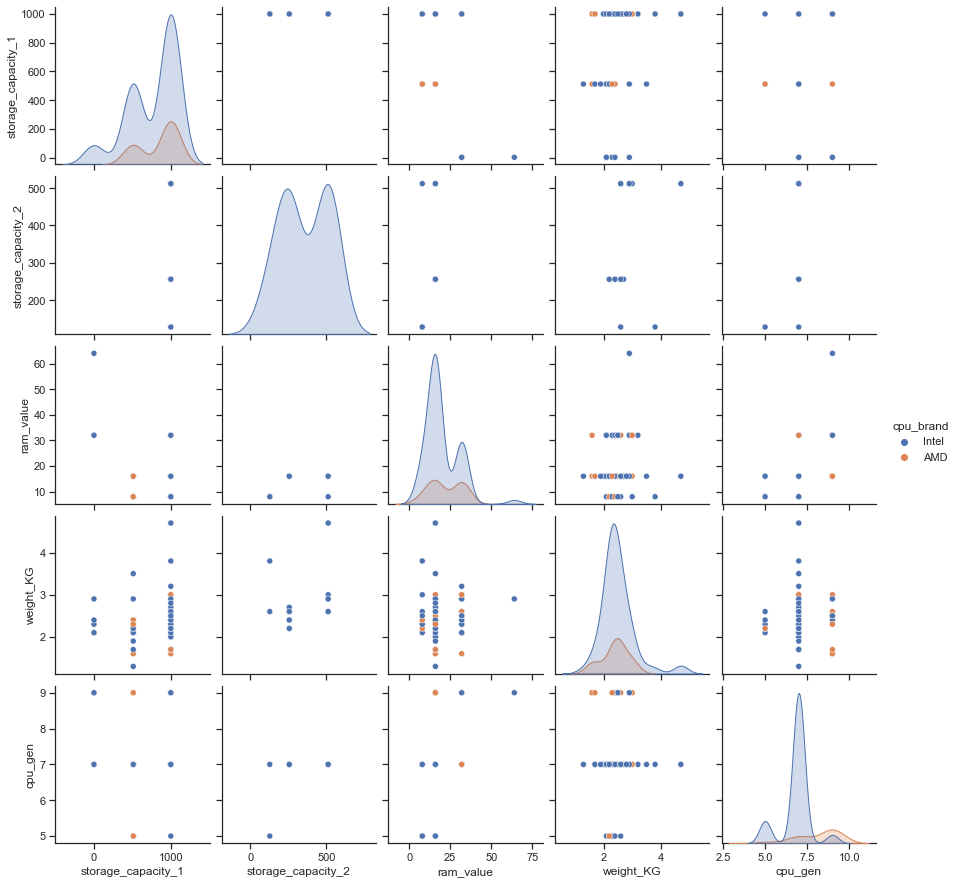

In [26]:
sb.set_theme(style="ticks")
cols= ['storage_capacity_1', 'storage_capacity_2', 'ram_value', 'weight_KG','cpu_gen', 'cpu_brand']
sb.pairplot(df_fr[cols], hue='cpu_brand');

Here we will try to estimate the price but this time using also GPU info to get better estimeated 

In [27]:
df_fr.ports.value_counts()
def extract_gpu_info(string):
    """Extracts GPU informatio from strings handeling extra spaces and tabs and diffrent orientaions


    Args:
        string (str): string of the laptop specs

    Returns:
        (string, int): (model generation, model_number)
    """    
    if type(string)!= str:
        return "None", 0
    extract_gpu_type= r'(:?RTX *\d+| GTX *\d+ *(Ti)*)'
    reg_exp= re.search(extract_gpu_type,string, re.IGNORECASE)
    gpu_type= reg_exp[0] if reg_exp else 'None'
    gpu_num= int(re.search(r'\d+', gpu_type, re.IGNORECASE)[0]) if re.search(r'\d+', gpu_type, re.IGNORECASE) else 0
    gpu_brand=  re.search(r'(:?RTX+|GTX)', gpu_type, re.IGNORECASE)[0] if re.search(r'(:?RTX+| GTX)', gpu_type, re.IGNORECASE) else 'None'
    return gpu_brand, gpu_num
df_fr['gpu_gen']= df_fr.ports.map(lambda x:extract_gpu_info(x)[0])
df_fr['gpu_num']= df_fr.ports.map(lambda x:extract_gpu_info(x)[1])
df_fr['gpu_info']= df_fr.ports.map(lambda x:extract_gpu_info(x))

In [28]:
df_model= df_fr.copy()
df_model['intercept'] = 1
# one hot encode earliest arrival
df_model= df_fr.join(pd.get_dummies(df_fr.earliest_arrival))
#one hot encode storage_type1
df_model= df_model.join(pd.get_dummies(df_fr.storage_type_1, prefix='type_1'))
df_model= df_model.join(pd.get_dummies(df_fr.storage_type_2, prefix='type_2'))
df_model= df_model.join(pd.get_dummies(df_fr.cpu_brand))
df_model= df_model.join(pd.get_dummies(df_fr.gpu_info, prefix='gpu'))

In [29]:
df_model['intercept'] = 1
# "gpu_('None', 0)", removed
cols_to_consider= ['storage_capacity_1', 'storage_capacity_2', 'ram_value', 'weight_KG',
                   'Intel','type_1_SSD', 'type_2_SSD', 'cpu_gen', 'intercept',"gpu_('GTX', 1050)",
       "gpu_('GTX', 1060)", "gpu_('GTX', 1070)", "gpu_('GTX', 1650)",
       "gpu_('GTX', 1660)", "gpu_('RTX', 1650)",
       "gpu_('RTX', 2060)", "gpu_('RTX', 2070)", "gpu_('RTX', 2080)",
       "gpu_('RTX', 3060)", "gpu_('RTX', 3070)", "gpu_('RTX', 3080)"]
df_model= df_model.fillna(0)
res = sm.OLS(df_model['price'], df_model[cols_to_consider]).fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                  OLS                Adj. R-squared:       0.764     
Dependent Variable:     price              AIC:                  1257.2293 
Date:                   2021-08-04 11:09   BIC:                  1307.5127 
No. Observations:       81                 Log-Likelihood:       -607.61   
Df Model:               20                 F-statistic:          13.93     
Df Residuals:           60                 Prob (F-statistic):   1.11e-15  
R-squared:              0.823              Scale:                2.5912e+05
---------------------------------------------------------------------------
                     Coef.     Std.Err.    t    P>|t|    [0.025     0.975] 
---------------------------------------------------------------------------
storage_capacity_1    -0.1921    0.2390 -0.8040 0.4246    -0.6701    0.2859
storage_capacity_2     1.0685    1.0563  1.0116 0.3158    -1.0444    3.1813
ram_value             44.5384    9.3537  4.7616 0.0000    25.8283   63.2485
weight_KG             16.5416  135.8016  0.1218 0.9035  -255.1020  288.1852
Intel                497.6500  206.2095  2.4133 0.0189    85.1696  910.1304
type_1_SSD           677.4872  765.8972  0.8846 0.3799  -854.5354 2209.5098
type_2_SSD           217.7379  772.3445  0.2819 0.7790 -1327.1812 1762.6569
cpu_gen              203.0725   79.1111  2.5669 0.0128    44.8268  361.3182
intercept          -1046.3623 1058.0404 -0.9890 0.3267 -3162.7581 1070.0336
gpu_('GTX', 1050)   -491.2036  560.8487 -0.8758 0.3846 -1613.0680  630.6607
gpu_('GTX', 1060)    -62.7084  392.0378 -0.1600 0.8735  -846.9008  721.4840
gpu_('GTX', 1070)    241.6812  585.2809  0.4129 0.6811  -929.0549 1412.4174
gpu_('GTX', 1650)   -208.3110  347.5852 -0.5993 0.5512  -903.5849  486.9629
gpu_('GTX', 1660)   -219.5559  260.0888 -0.8442 0.4019  -739.8109  300.6992
gpu_('RTX', 1650)   -667.9136  523.1894 -1.2766 0.2067 -1714.4482  378.6211
gpu_('RTX', 2060)    -44.2527  236.7257 -0.1869 0.8523  -517.7746  429.2692
gpu_('RTX', 2070)    -41.0813  198.3976 -0.2071 0.8367  -437.9355  355.7730
gpu_('RTX', 2080)    588.4288  326.3107  1.8033 0.0764   -64.2898 1241.1474
gpu_('RTX', 3060)    249.2119  275.8710  0.9034 0.3699  -302.6124  801.0361
gpu_('RTX', 3070)    617.1219  245.3357  2.5154 0.0146   126.3775 1107.8663
gpu_('RTX', 3080)   1541.1303  306.0059  5.0363 0.0000   929.0274 2153.2333
---------------------------------------------------------------------------
Omnibus:                  11.840          Durbin-Watson:             1.474 
Prob(Omnibus):            0.003           Jarque-Bera (JB):          13.382
Skew:                     0.746           Prob(JB):                  0.001 
Kurtosis:                 4.318           Condition No.:             21406 
===========================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [30]:
df_fr['gpu_gen']= df_fr.ports.map(lambda x:extract_gpu_info(x)[0])
df_fr['gpu_num']= df_fr.ports.map(lambda x:extract_gpu_info(x)[1])
df_model= df_fr.copy()
# one hot encode earliest arrival
df_model= df_fr.join(pd.get_dummies(df_fr.earliest_arrival))
#one hot encode storage_type1
df_model= df_model.join(pd.get_dummies(df_fr.storage_type_1, prefix='type_1'))
df_model= df_model.join(pd.get_dummies(df_fr.storage_type_2, prefix='type_2'))
df_model= df_model.join(pd.get_dummies(df_fr.cpu_brand))
df_model= df_model.join(pd.get_dummies(df_fr.gpu_gen, prefix='gpu_type'))
df_model= df_model.join(pd.get_dummies(df_fr.gpu_num, prefix='gpu_num'))
df_model.columns


Index(['Unnamed: 0', 'text', 'url', 'display', 'refresh_rate', 'cpu',
       'storage', 'ram', 'price', 'earliest_arrival', 'ports',
       'price_before_discount', 'discount', 'cpu_name', 'cpu_gen', 'cpu_brand',
       'discount_value', 'ram_value', 'weight_KG', 'store', 'storage_type_1',
       'storage_capacity_1', 'storage_type_2', 'storage_capacity_2', 'gpu_gen',
       'gpu_num', 'gpu_info', 'chez vous dès vendredi 12 mars', 'indisponible',
       'sous 6 jours ouvrés', 'type_1_Disque dur', 'type_1_SSD', 'type_2_SSD',
       'AMD', 'Intel', 'gpu_type_GTX', 'gpu_type_None', 'gpu_type_RTX',
       'gpu_num_0', 'gpu_num_1050', 'gpu_num_1060', 'gpu_num_1070',
       'gpu_num_1650', 'gpu_num_1660', 'gpu_num_2060', 'gpu_num_2070',
       'gpu_num_2080', 'gpu_num_3060', 'gpu_num_3070', 'gpu_num_3080'],
      dtype='object')

Here the model shows to predict price with 0.76% of the price varaible can be interupted using these features
with Ram and CPU brand and CPU geneartion being the most influencial featuers. _NB: this is a single store not the whole datase_

In [31]:
# df_model.dtypes
df_model['intercept'] = 1
# gpu_type_None is removed
cols_to_consider= ['storage_capacity_1', 'storage_capacity_2', 'ram_value', 'weight_KG',
                   'Intel','type_1_SSD', 'type_2_SSD', 'cpu_gen', 'intercept',"gpu_type_GTX", 'gpu_type_RTX', 'gpu_num_1050', 'gpu_num_1060', 'gpu_num_1070', 'gpu_num_1650',
       'gpu_num_1660', 'gpu_num_2060', 'gpu_num_2070', 'gpu_num_2080',
       'gpu_num_3060', 'gpu_num_3070', 'gpu_num_3080']
df_model= df_model.fillna(0)
res = sm.OLS(df_model['price'], df_model[cols_to_consider]).fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                  OLS                Adj. R-squared:       0.764     
Dependent Variable:     price              AIC:                  1257.2293 
Date:                   2021-08-04 11:09   BIC:                  1307.5127 
No. Observations:       81                 Log-Likelihood:       -607.61   
Df Model:               20                 F-statistic:          13.93     
Df Residuals:           60                 Prob (F-statistic):   1.11e-15  
R-squared:              0.823              Scale:                2.5912e+05
---------------------------------------------------------------------------
                     Coef.     Std.Err.    t    P>|t|    [0.025     0.975] 
---------------------------------------------------------------------------
storage_capacity_1    -0.1921    0.2390 -0.8040 0.4246    -0.6701    0.2859
storage_capacity_2     1.0685    1.0563  1.0116 0.3158    -1.0444    3.1813
ram_value             44.5384    9.3537  4.7616 0.0000    25.8283   63.2485
weight_KG             16.5416  135.8016  0.1218 0.9035  -255.1020  288.1852
Intel                497.6500  206.2095  2.4133 0.0189    85.1696  910.1304
type_1_SSD           677.4872  765.8972  0.8846 0.3799  -854.5354 2209.5098
type_2_SSD           217.7379  772.3445  0.2819 0.7790 -1327.1812 1762.6569
cpu_gen              203.0725   79.1111  2.5669 0.0128    44.8268  361.3182
intercept          -1046.3623 1058.0404 -0.9890 0.3267 -3162.7581 1070.0336
gpu_type_GTX         414.4369  374.7305  1.1060 0.2732  -335.1357 1164.0095
gpu_type_RTX         -45.1657  294.1688 -0.1535 0.8785  -633.5909  543.2595
gpu_num_1050        -905.6405  601.2698 -1.5062 0.1373 -2108.3592  297.0781
gpu_num_1060        -477.1453  477.3455 -0.9996 0.3215 -1431.9785  477.6879
gpu_num_1070        -172.7556  630.4705 -0.2740 0.7850 -1433.8844 1088.3731
gpu_num_1650        -622.7479  313.5498 -1.9861 0.0516 -1249.9409    4.4452
gpu_num_1660        -633.9927  416.2118 -1.5232 0.1330 -1466.5404  198.5549
gpu_num_2060           0.9130  341.8952  0.0027 0.9979  -682.9793  684.8053
gpu_num_2070           4.0844  317.3193  0.0129 0.9898  -630.6486  638.8175
gpu_num_2080         633.5945  396.2352  1.5990 0.1151  -158.9940 1426.1830
gpu_num_3060         294.3776  362.4936  0.8121 0.4200  -430.7176 1019.4727
gpu_num_3070         662.2876  350.8452  1.8877 0.0639   -39.5073 1364.0825
gpu_num_3080        1586.2960  387.9886  4.0885 0.0001   810.2033 2362.3888
---------------------------------------------------------------------------
Omnibus:            11.840      Durbin-Watson:         1.474               
Prob(Omnibus):      0.003       Jarque-Bera (JB):      13.382              
Skew:               0.746       Prob(JB):              0.001               
Kurtosis:           4.318       Condition No.:         15951145266526756864
===========================================================================
* The condition number is large (2e+19). This might indicate
strong multicollinearity or other numerical problems.
"""

what is the frequencey of each brand with a specific GPU generation

Intel dominates in all but shows that it is more appeling ot non gamers unlike AMD who is uslaly paired with a gaming GPU

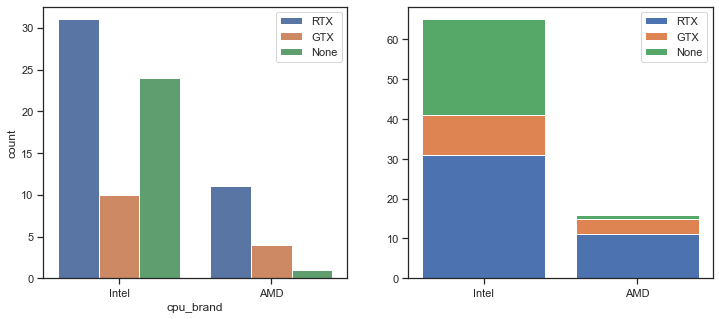

In [32]:
cat1_order = ['Intel', 'AMD']
cat2_order = ['RTX', 'GTX', 'None']

plt.figure(figsize = [12, 5])

# left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
sb.countplot(data = df_fr, x = 'cpu_brand', hue = 'gpu_gen',
             order = cat1_order, hue_order = cat2_order)
plt.legend()


# right plot: stacked bar chart, absolute counts
plt.subplot(1, 2, 2)
df= df_fr
baselines = np.zeros(len(cat1_order))
# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df[df['gpu_gen'] == cat2]['cpu_brand'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines)
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order)


How does the distribution of price vary based on which GPU is used?

cOntrary to popular belif it seems that laptops with no GPU are very diverse and can be even more expensive then laptops with GTX.

(-236.8416644812388, 7253.425359872487)

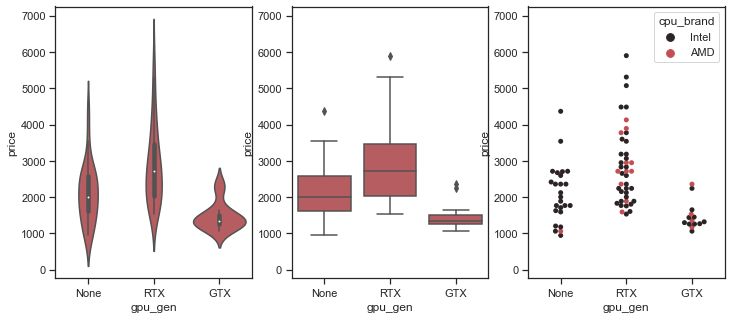

In [33]:

plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[3]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.violinplot(data = df, x = 'gpu_gen', y = 'price', color = base_color)

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = df, x = 'gpu_gen', y = 'price', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

# right plot: swarm plot
plt.subplot(1, 3, 3)
sb.swarmplot(data = df, x = 'gpu_gen', y = 'price', hue='cpu_brand',color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

expore when is each cpu gen paired with a gpu gen 

(0.24286315590093643, 5.7571368440990645)

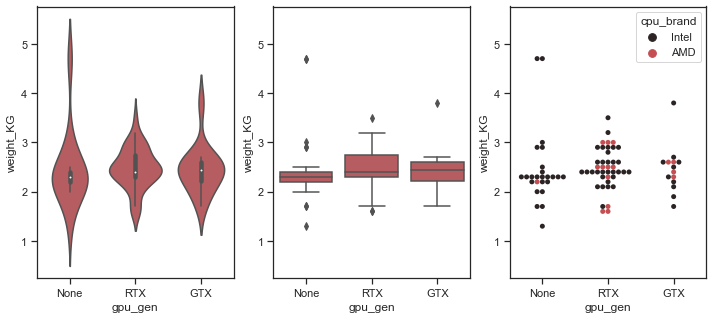

In [34]:

plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[3]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.violinplot(data = df, x = 'gpu_gen', y = 'weight_KG', color = base_color)

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = df, x = 'gpu_gen', y = 'weight_KG', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

# right plot: swarm plot
plt.subplot(1, 3, 3)
sb.swarmplot(data = df, x = 'gpu_gen', y = 'weight_KG', hue='cpu_brand',color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

Is there a relation between the price and the weight of a device?

 _NB: this data is only availaible in the French store as it was not mentioed in the other stores

 it seems there is no consistent realtion but laptops with GPU usually weight from 2 to 3 kilos 

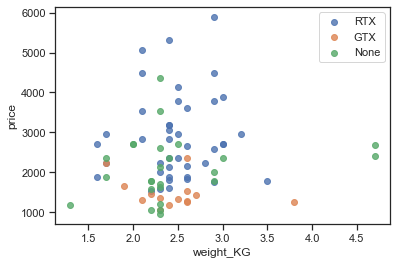

In [35]:
cat= ['RTX', 'GTX', 'None']
for i, category in enumerate(cat):
    sb.regplot(data= df_fr[df_fr.gpu_gen==category], x='weight_KG', y='price', fit_reg=False, color=sb.color_palette()[i]);
plt.legend(cat)

What is the weight distribution of Laptops with diffrent GPU's installed relative to each other? to see weather laptops with GPU are actually heavier? 

they are not heavier but they are not light either it seems they are simply more concentrated between 2 and 3 KG with almost no putliers while Laptops without a gaming GPU seem to also sometimes weight as low as 1 kilo but can sometimes also weight a lot heavier

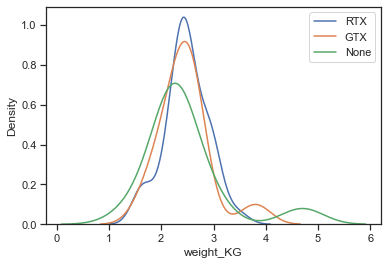

In [36]:
cat= ['RTX', 'GTX', 'None']
for i, category in enumerate(cat):
    sb.kdeplot(df_fr[df_fr.gpu_gen==category]['weight_KG']);
plt.legend(cat);

Laptops with GPU do not seem to be heavier then those without 

In [37]:
df_fr.columns

Index(['Unnamed: 0', 'text', 'url', 'display', 'refresh_rate', 'cpu',
       'storage', 'ram', 'price', 'earliest_arrival', 'ports',
       'price_before_discount', 'discount', 'cpu_name', 'cpu_gen', 'cpu_brand',
       'discount_value', 'ram_value', 'weight_KG', 'store', 'storage_type_1',
       'storage_capacity_1', 'storage_type_2', 'storage_capacity_2', 'gpu_gen',
       'gpu_num', 'gpu_info'],
      dtype='object')

Show a coreelation martix of all the features to see any strong corelations?

the most notable is RAM value and price

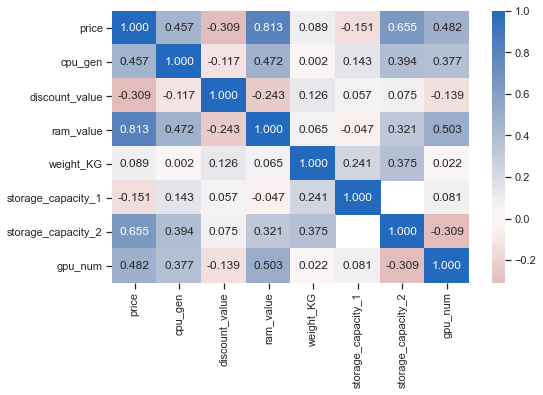

In [38]:
# correlation plot
numeric_vars= [
       'price','cpu_gen',
       'discount_value', 'ram_value', 'weight_KG','storage_capacity_1',
       'storage_capacity_2','gpu_num']
plt.figure(figsize = [8, 5])
sb.heatmap(df_fr[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

this shows that there are only 3 strong corellations 
1. price and ram as ram seems to be very involved with price
2. ram and gpu_num so high end laptops usally are given high end rams 
3. price and 2nd_storage capacity which does show that laptops get a lop more expensive when a 2nd storage is added

See if there is a correlation between any of the Features? 

Doesn't seem to be anything noticable

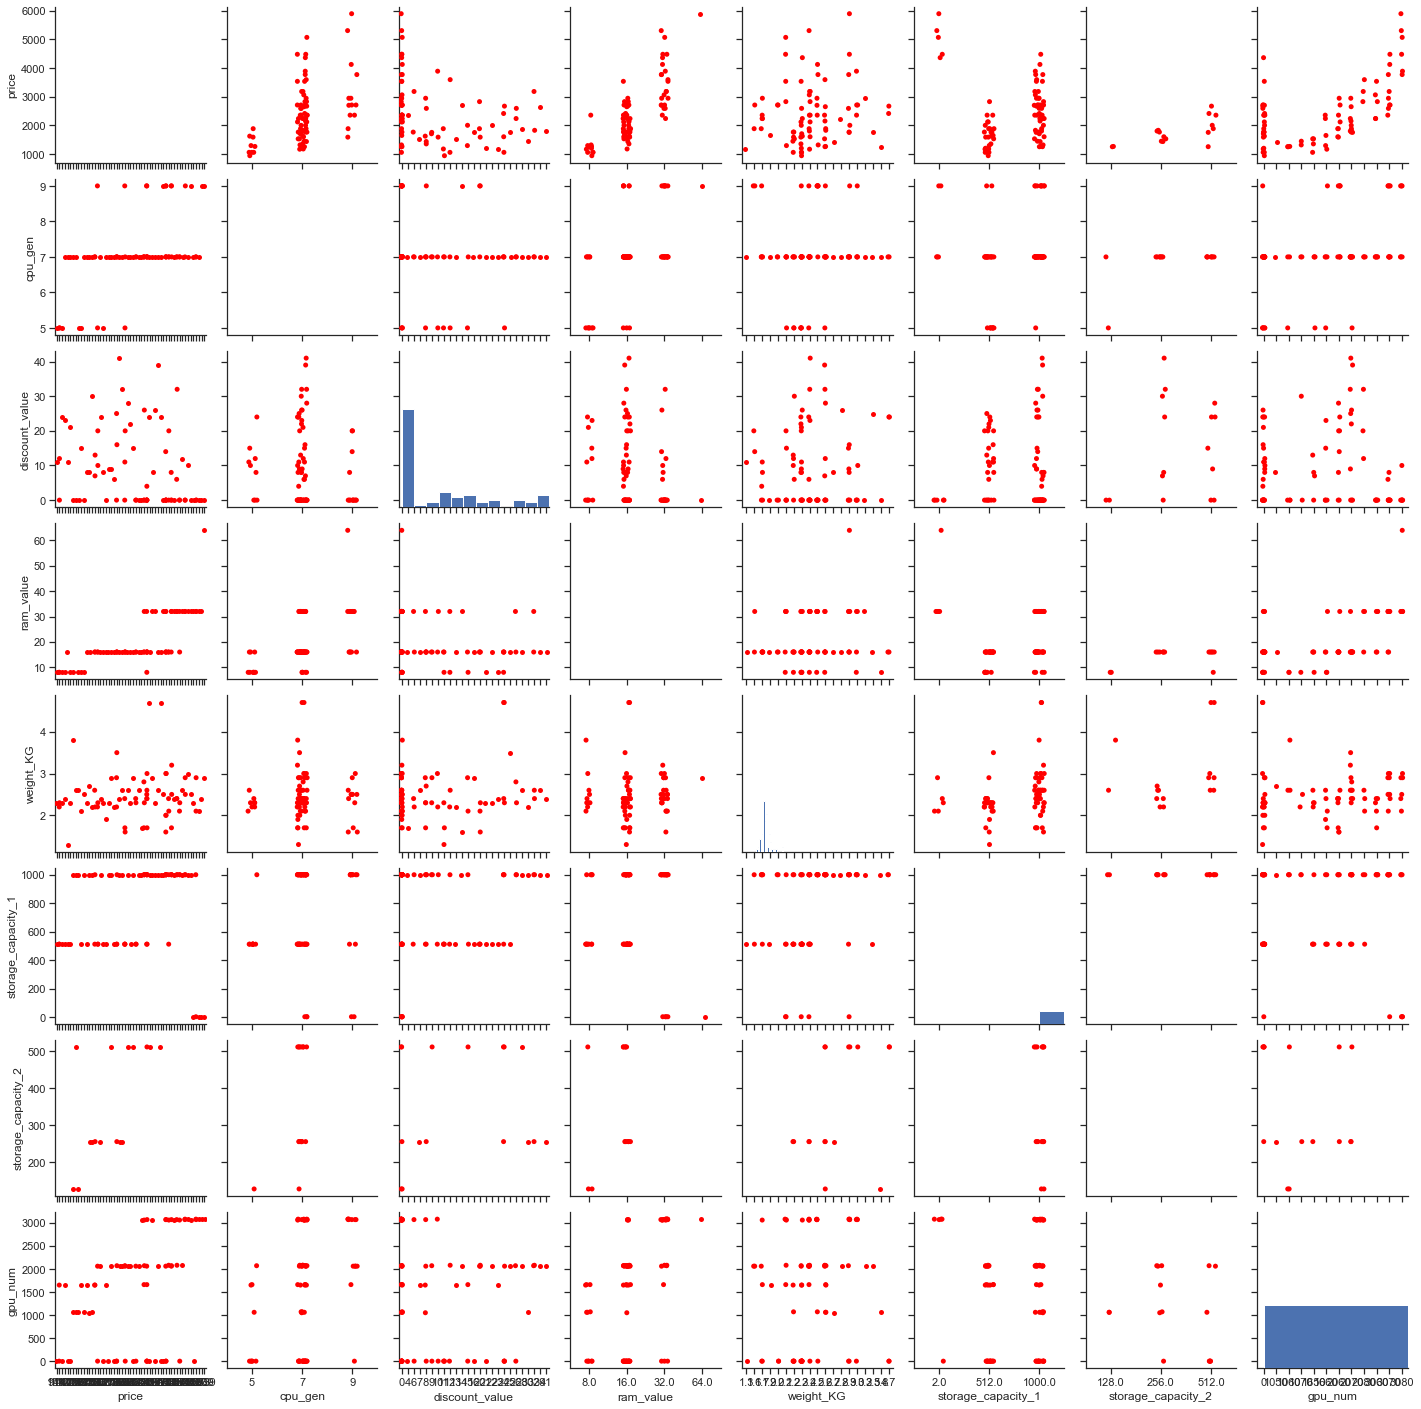

In [39]:
g = sb.PairGrid(data = df_fr, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(sb.stripplot, jitter= True, color='red');
# g.map(sb.stripplot, jitter=True, size=3);

In [40]:
df_eg= pd.read_csv('./clean/jumia_store.csv')
df_eg.sample(5)

,Unnamed: 0,url,text,discount,original_price_EPG,brand,brand_url,price,discount_value,ram_value,cpu_name,cpu_gen,cpu_brand,store
44,47,https://www.jumia.com.eg/omen-15-gaming-laptop...,HP OMEN 15 Gaming Laptop - Intel Core I7 - 16G...,17%,"EGP 29,999",HP,https://www.jumia.com.eg/hp/,1800,17,16,I7,7,Intel,Jumia (EG)
26,27,https://www.jumia.com.eg/hp-pavilion-gaming-15...,HP Pavilion Gaming - 15-dk0056wm 1TB+256 SSD C...,9%,"EGP 15,188",HP,https://www.jumia.com.eg/hp/,911,9,8,I5,5,Intel,Jumia (EG)
11,11,https://www.jumia.com.eg/gf65-thin-9sexr-gamin...,MSI GF65 Thin 9SEXR Gaming Laptop - Intel Core...,20%,"EGP 19,999",MSI,https://www.jumia.com.eg/msi/,1200,20,16,I7,7,Intel,Jumia (EG)
22,23,https://www.jumia.com.eg/msi-gf63-thin-gaming-...,MSI GF63 Thin Gaming Laptop - Intel Core I5 - ...,18%,"EGP 13,999",MSI,https://www.jumia.com.eg/msi/,840,18,8,I5,5,Intel,Jumia (EG)
20,21,https://www.jumia.com.eg/g5-15-5500-gaming-lap...,DELL G5 15-5500 Gaming Laptop - Intel Core I7-...,11%,"EGP 20,499",DELL,https://www.jumia.com.eg/dell/,1230,11,16,I7,7,Intel,Jumia (EG)


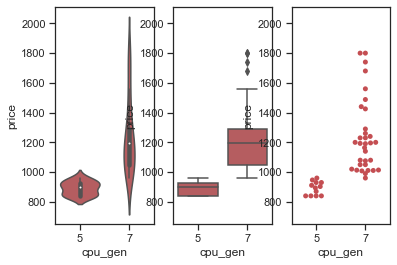

In [41]:
plt.figureSize= 20, 8
plt.subplot(1, 3, 1)
df=df_eg
ax1 = sb.violinplot(data = df, x = 'cpu_gen', y = 'price', color = base_color)

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = df, x = 'cpu_gen', y = 'price', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

# right plot: swarm plot
plt.subplot(1, 3, 3)
sb.swarmplot(data = df, x = 'cpu_gen', y = 'price', color = base_color)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

In [42]:
df_laptop.store.value_counts()

Boulanger (FR)    82
Amazon (SA)       72
Jumia (EG)        45
Name: store, dtype: int64

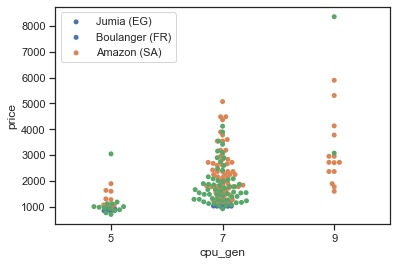

In [43]:
df_vis= df_laptop.copy()
# df_vis= df_vis[~(df_vis.discount_value ==0)]
markers= [['Jumia (EG)', '^'], ['Boulanger (FR)', 's'], ['Amazon (SA)', 'o']]
for i ,(category, marker) in enumerate(markers):
    temp= df_vis[df_vis['store']== category]
    sb.swarmplot(data = temp, y= 'price', x= 'cpu_gen', color= sb.color_palette()[i]) 
plt.legend(labels=['Jumia (EG)', 'Boulanger (FR)', 'Amazon (SA)'])

In [44]:
# i think this is enough now just get all the data and get piechart for intel vs amd and any vis that works on entire dataset use it also extract the gpu values from egy store to use them in the vis of fr store

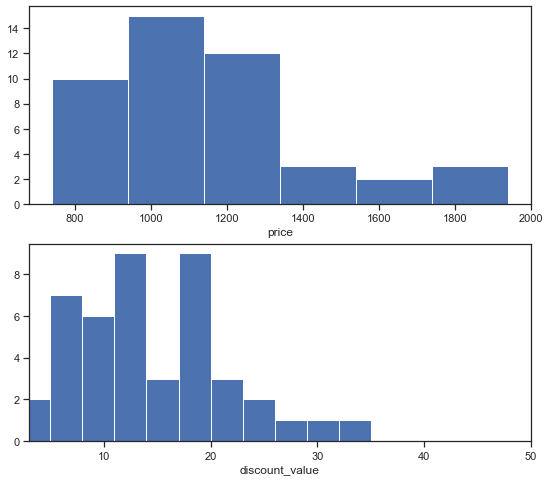

In [45]:
# re-using code to plot depth and table.
fig, ax = plt.subplots(nrows=2, figsize = [9,8])

variables = [['price',200], ['discount_value', 3]]
# bin_size= 10
for i, (var, bin_size) in enumerate(variables):
    bins = np.arange(min(df[var])-bin_size//2, max(df[var])+bin_size+bin_size//2, bin_size)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
plt.xlim((3, 50))
plt.show()

In [46]:
df_sa= pd.read_csv('./clean/amazon_sa_store.csv')
df_full= pd.concat([df_fr,df_eg, df_sa]).drop_duplicates().reset_index(drop=True)
df_full.shape

(200, 30)

Here we explore the frequency of a manufacturer pairing a GPU with each CPU brand

AMD seems to be more gaming oriented as it almost is never sold without a gaming GPU

Intel on the other hand has a healthy mix as it is sometimes also sold with no gaming GPU like in slimbooks.

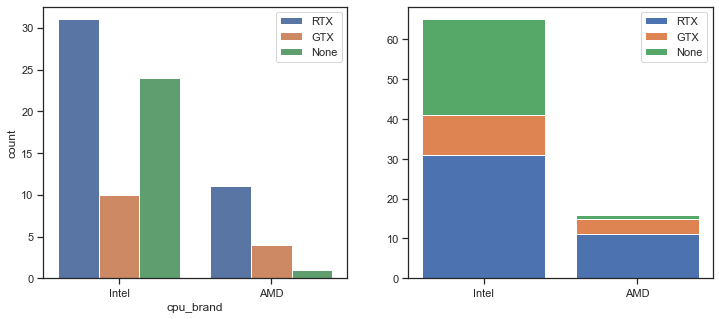

In [47]:
cat1_order = ['Intel', 'AMD']
cat2_order = ['RTX', 'GTX', 'None']

plt.figure(figsize = [12, 5])

# left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
sb.countplot(data = df_fr, x = 'cpu_brand', hue = 'gpu_gen',
             order = cat1_order, hue_order = cat2_order)
plt.legend()


# right plot: stacked bar chart, absolute counts
plt.subplot(1, 2, 2)
df= df_full
baselines = np.zeros(len(cat1_order))
# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df[df['gpu_gen'] == cat2]['cpu_brand'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines)
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order)


The GTX is not paired a lot with Generation 9 CPU and it is mostly paired with Gen 7 CPU. yet it is the most comman in out dataset

C:\Users\Karim\anaconda3\envs\project-env\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


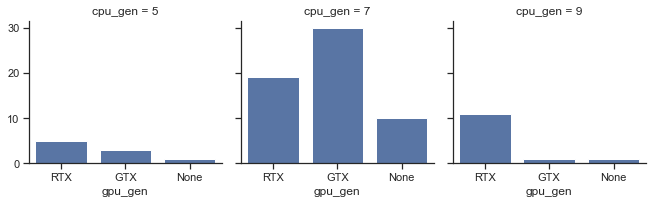

In [48]:
df_full= pd.concat([df_fr,df_eg, df_sa]).drop_duplicates().reset_index(drop=True)
df_vis= df_full[~df_full.gpu_gen.isna()]
df_vis= df_full[~df_full.cpu_gen.isna()]
df_vis['cpu_gen']= df_full.cpu_gen.map(lambda x: int(x))
df_vis= df_vis[df_vis.cpu_gen > 3]
df_vis.gpu_gen.value_counts()
# sb.barplot(data=df_vis, x='VClass', y='comb', color=base_color, errwidth=0)
df_vis.groupby(['cpu_gen', 'gpu_gen']).count()
# vis
g = sb.FacetGrid(data = df_vis, col = 'cpu_gen', col_wrap = 7)

g.map(sb.countplot, "gpu_gen")


Looking for a relation between price, discount and cpu_gen

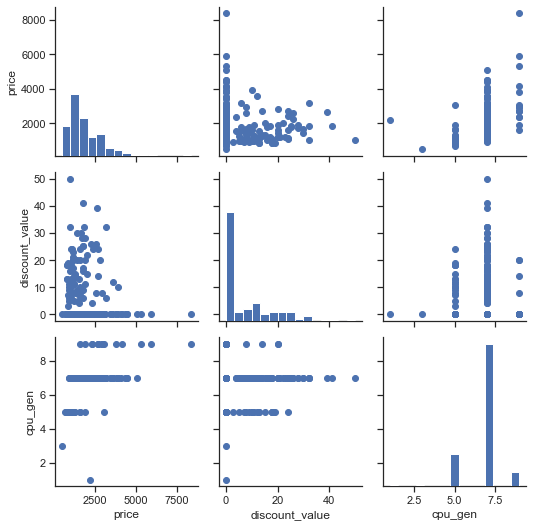

In [49]:
g = sb.PairGrid(data = df, vars = ['price', 'discount_value', 'cpu_gen'])
g.map_diag(plt.hist, bins=15)
g.map_offdiag(plt.scatter)

Look at the average price for each combination of CPU and GPU generations

it is clear that the RTX with 9th gen is the most impressive
but what I think is worth noting is that 9th Gen Cpu without a GPU actually come in second place. which shows that most of the price diffrence is due to the CPU

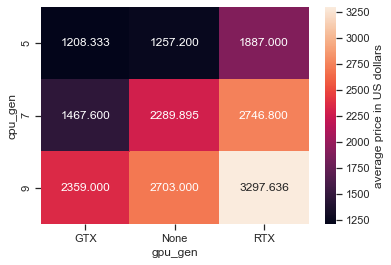

In [50]:
df= df_full
cat_means = df.groupby(['cpu_gen', 'gpu_gen']).mean()['price']
cat_means = cat_means.reset_index(name = 'price_avg')
cat_means = cat_means.pivot(index = 'cpu_gen', columns = 'gpu_gen',
                            values = 'price_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'average price in US dollars'});

see the number of laptops in each category

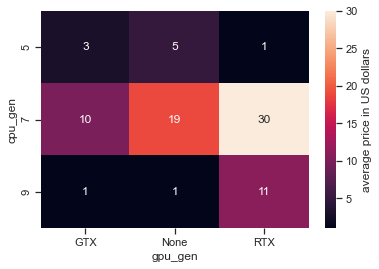

In [51]:
df= df_full
cat_means = df.groupby(['cpu_gen', 'gpu_gen']).nunique()['text']
cat_means = cat_means.reset_index(name = 'price_avg')
cat_means = cat_means.pivot(index = 'cpu_gen', columns = 'gpu_gen',
                            values = 'price_avg')
sb.heatmap(cat_means, annot = True,
           cbar_kws = {'label' : 'average price in US dollars'});